# Lab 5 - Polynomial Interpolation and Error
## February 27 - March 1, 2023
## Student 1 Name: $\underline{Kanishk \ Dad\hspace{3in}}$ Student 1 ID No. $\underline{202103005\hspace{1.5in}}$
## Student 2 Name: $\underline{Aditya \ Tanna\hspace{3in}}$ Student 2 ID No. $\underline{202103023\hspace{1.5in}}$
## Student 3 Name: $\underline{Vraj \ Thakkar\hspace{3in}}$ Student 3 ID No. $\underline{202103052\hspace{1.5in}}$
## Date of Submission: $\underline{02/03/23}$
***

In [1]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import math

### Q.1 Write a function `mychebynodes` that takes in $n$, the number of points to be interpolated between $[-,1,1]$, and outputs the points $z_k = \left(\frac{2k+1}{2n}\right)\pi,k=0,\ldots,n-1$. For interpolating a given function $f$, use samples $\{(z_k,f(z_k)),k=0,\ldots,n-1\}$ for Lagrange/Newton's polynomial interpolating methods. These points are called *Chebyshev Nodes*.

enter the value of n 11



 chebyshev points [ 9.89821442e-01  9.09631995e-01  7.55749574e-01  5.40640817e-01
  2.81732557e-01  6.12323400e-17 -2.81732557e-01 -5.40640817e-01
 -7.55749574e-01 -9.09631995e-01 -9.89821442e-01]

 array of cofficient from newton's method [ 0.50511518 -0.52502288  0.23501672  0.17051053 -0.34764623 -0.07256727
  0.30314043  0.24906272  0.01256531 -0.12484015 -0.12612391]


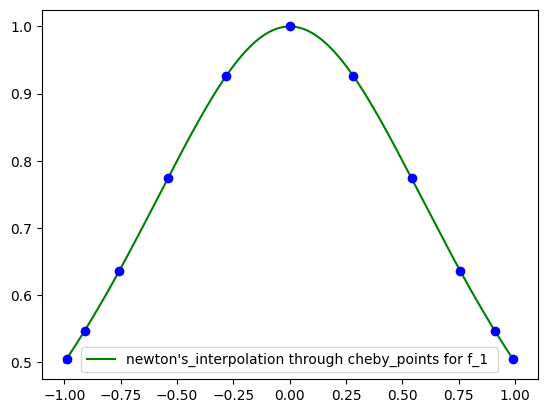

In [3]:
###  Chebyshev Nodes
### def mychebynodes(n):
# function   y = 1/(1+ x**2)
n = int(input("enter the value of n"))
s = math.pi

def cheby_points(n):
    i = 0
    cheby_nodes_array = []
    while (i < n):
        # chebyshev's_nodes
        z_k = math.cos(((2*i + 1)/(2*n)) * s)
        cheby_nodes_array = np.append(cheby_nodes_array, z_k)
        i += 1
    print('\n', 'chebyshev points', cheby_nodes_array)
    return cheby_nodes_array

cheby_nodes_array = cheby_points(n)


def newpolynomial(x):
    y = 1/(1+ x**2)
    return y

x_poly = np.linspace(-1, 1, 1000)
y_poly = [newpolynomial(x)for x in x_poly]
# plt.plot(x_poly, y_poly, 'red', label='new polynomial')

cheby_nodes_y = [newpolynomial(x)for x in cheby_nodes_array]

# newton's polynomial
n = len(cheby_nodes_array) - 1
a = [cheby_nodes_y[0]]
a_1 = (cheby_nodes_y[0] - cheby_nodes_y[1])/(cheby_nodes_array[0] - cheby_nodes_array[1])
a = np.append(a, a_1)

def x_conti(n, i):
    term = 1
    for j in range(i):
        term = term*(cheby_nodes_array[n] - cheby_nodes_array[j])
    return term

def kanishk(n, A):
    p_x = 0
    for i in range(A):
        p_x += a[i]*(x_conti(n, i))
    return p_x

# for array of cofficient
for i in range(n+1):
    if i < 2:
        continue
    a_i = (cheby_nodes_y[i] - kanishk(i, i))/(x_conti(i, i))
    a = np.append(a, a_i)
print('\n', "array of cofficient from newton's method", a)

n = n+1

def variable(z):
    ans = 0
    # array_of_x_variables = []
    for k in range(n):
        last = 1
        for i in range(k):
            last = last*(z-cheby_nodes_array[i])
            # print(last)
            # array_of_x_variables= np.append(array_of_x_variables,last)
        ans += a[k]*last
    return ans

y_new_poly = variable(x_poly)
plt.plot(x_poly, y_new_poly,'green',label="newton's_interpolation through cheby_points for f_1 ")
plt.plot(cheby_nodes_array,cheby_nodes_y,'bo')
plt.legend()
plt.show()


### Q.1(a) Plot $w^{chebyshev}_n(x) = \prod_{k=0}^{n-1}(x-z_k)$ against $x$ at several samples (approx. $1000$) in the interval $[-1,1]$, for a few different values of $n$. Compare with $w_n(x) = \prod_{k=0}^{n}(x-x_k)$ where $x_k$ are uniformly sampled points in the interval $[-1,1]$. Record your observations.

enter the value of n 11


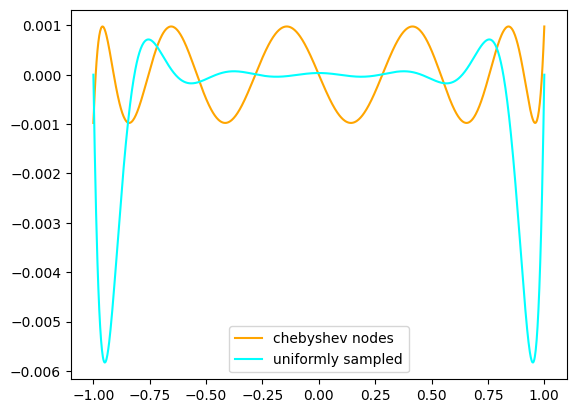

In [6]:
### Compare w_chebyshev against w_n.
n = int(input("enter the value of n"))
s = math.pi

def cheby_points(n):
    i = 0
    cheby_nodes_array = []
    while (i < n):
        z_k = math.cos(((2*i + 1)/(2*n)) * s)
        cheby_nodes_array = np.append(cheby_nodes_array, z_k)
        i += 1
    return cheby_nodes_array

cheby_nodes_array = cheby_points(n)


def uniform_x_points(n):
   a = 2/n
   x_points = -1
   uniformly_sampled_points = [-1]
   i = 0
   while(i < n):
        x_points = x_points + a
        uniformly_sampled_points = np.append(uniformly_sampled_points, x_points)
        i += 1
   return uniformly_sampled_points

uniformly_sampled_points = uniform_x_points(n)

def x_cheby(x):
    term = 1
    for j in range(len(cheby_nodes_array)):
        term = term*(x - cheby_nodes_array[j])
    return term
    
def x_unif(x):
    term = 1
    for j in range(len(uniformly_sampled_points)):
        term = term*(x - uniformly_sampled_points[j])
    return term

x_n = np.linspace(-1,1,1000)
y_cheby = [x_cheby(x)for x in x_n]
y_unif = [x_unif(x) for x in x_n]

plt.plot(x_n,y_cheby,'orange',label = 'chebyshev nodes')
plt.plot(x_n,y_unif,'cyan',label = 'uniformly sampled')
plt.legend()
plt.show()

### <font color="red"> Ans 1. Write your observations here <font>
### <font color = "green"> for uniformly sampled points
### <font color = "black"> for 'odd' values of "n" the graph is an 'even' values of function and for even "n" the graph is an odd function; also the maximum value occur near the end points innstead of central points
### <font color = "green"> for chebyshev sample points
### <font color = "black"> for 'even' values of "n" the graph is an 'even' values of function and for odd "n" the graph is an odd function


***
### Q.2: Compare the interpolation error using either Lagrange or Newton's method for the functions $f_1(x)=\frac{1}{1+25x^2}, x \in [-1,1]$ and $f_2(x) = \sqrt{x},x\in [0,4]$ using uniformly sampled $n$ points in $[-1,1]$ and $[0,4]$ resp., with that obtained via Chebyshev nodes for a few different values of $n$. Plot the actual function, the interpolating polynomials, and the errors. Record your obsevations.

enter the value of n 11



 chebyshev points [ 9.89821442e-01  9.09631995e-01  7.55749574e-01  5.40640817e-01
  2.81732557e-01  6.12323400e-17 -2.81732557e-01 -5.40640817e-01
 -7.55749574e-01 -9.09631995e-01 -9.89821442e-01]

 array of cofficient from newton's method [ 3.92254355e-02 -8.58937974e-02  1.69875237e-01 -4.04254778e-01
  1.36188929e+00  5.14155647e-01 -1.01952077e+01 -2.67788865e+01
 -4.01217146e+01 -4.61582612e+01 -4.66329171e+01]


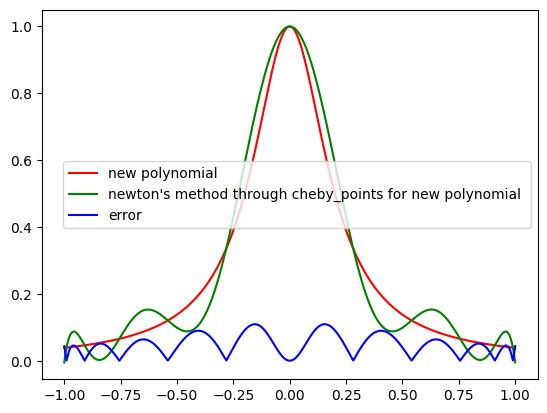

In [7]:
# f(x) = 1/(1+25x^2)                        = new polynomial
n = int(input("enter the value of n"))
s = math.pi


def cheby_points(n):
    i = 0
    cheby_nodes_array =  []
    while(i < n):
        # chebyshev's_nodes
        z_k = math.cos(((2*i + 1)/(2*n)) * s)
        cheby_nodes_array = np.append(cheby_nodes_array, z_k)
        i+=1
    print('\n','chebyshev points',cheby_nodes_array)
    return cheby_nodes_array

cheby_nodes_array= cheby_points(n)


def chebypolynomial(n, x):
    T_0 = 1
    T_1 = x
    iteration = 1
    while (iteration < n):
        T_2 = 2*x*T_1 - T_0
        T_0 = T_1
        T_1 = T_2
        iteration += 1
    T_2 = str(T_2)
    T_2 = eval(T_2)
    return T_2

T_n = chebypolynomial(n, 2)

# plotting the graph of 1/(1+25*(x**2))
def newpolynomial(x):
    y = 1/(1+25*(x**2))
    return y
x_poly = np.linspace(-1,1,1000)
y_poly = [newpolynomial(x)for x in x_poly]
plt.plot(x_poly,y_poly,'red', label ='new polynomial') 

cheby_nodes_y = [newpolynomial(x)for x in cheby_nodes_array]

# newton's polynomial
n = len(cheby_nodes_array) - 1
a = [cheby_nodes_y[0]]
a_1 = (cheby_nodes_y[0] - cheby_nodes_y[1])/(cheby_nodes_array[0] - cheby_nodes_array[1])
a = np.append(a, a_1)


def x_conti(n, i):
    term = 1
    for j in range(i):
        term = term*(cheby_nodes_array[n] - cheby_nodes_array[j])
    return term


def kanishk(n, A):
    p_x = 0
    for i in range(A):
        p_x += a[i]*(x_conti(n, i))
    return p_x


# for array of cofficient
for i in range(n+1):
    if i < 2:
        continue
    a_i = (cheby_nodes_y[i] - kanishk(i, i))/(x_conti(i, i))
    a = np.append(a, a_i)
print('\n', "array of cofficient from newton's method", a)

n = n+1


def variable(z):
    ans = 0
    # array_of_x_variables = []
    for k in range(n):
        last = 1
        for i in range(k):
            last = last*(z-cheby_nodes_array[i])
            # print(last)
            # array_of_x_variables= np.append(array_of_x_variables,last)
        ans += a[k]*last
    return ans

y_new_poly = variable(x_poly)

plt.plot(x_poly, y_new_poly, 'green',label="newton's method through cheby_points for new polynomial ")
# plotting for  error

v = y_new_poly - y_poly
plt.plot(x_poly, abs(v), 'b', label="error")


# plt.plot(scaled_array, scaled_y,label = 'chebysheve points' )5

plt.legend()
plt.show()


enter the value of n 11



 chebyshev points [ 9.89821442e-01  9.09631995e-01  7.55749574e-01  5.40640817e-01
  2.81732557e-01  6.12323400e-17 -2.81732557e-01 -5.40640817e-01
 -7.55749574e-01 -9.09631995e-01 -9.89821442e-01] 
 
 scaled points from chebyshev points [3.97964288 3.81926399 3.51149915 3.08128163 2.56346511 2.
 1.43653489 0.91871837 0.48850085 0.18073601 0.02035712] 
 
 squareroot of scaled points [1.99490423 1.95429373 1.87389945 1.75535798 1.60108248 1.41421356
 1.19855533 0.95849797 0.69892836 0.42513058 0.14267837]

 array of cofficient from newton's method [ 1.99490423e+00  2.53215972e-01 -1.70970255e-02  2.56618943e-03
 -5.61642486e-04  1.69844150e-04 -7.27121240e-05  4.71593724e-05
 -5.21173850e-05  1.21053354e-04 -9.46964574e-04]


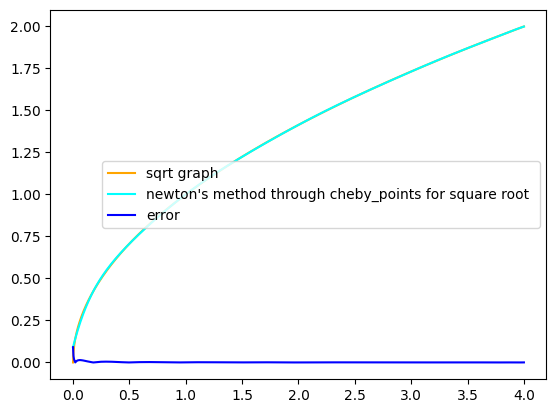

In [12]:
# f(x) = sqrt{x}
n = int(input("enter the value of n"))
s = math.pi

def cheby_scaled_points(n):
    i = 0
    cheby_nodes_array = []
    scaled_array = []
    scaled_y = []
    while (i < n):
        # chebyshev's_nodes
        z_k = math.cos(((2*i + 1)/(2*n)) * s)
        cheby_nodes_array = np.append(cheby_nodes_array, z_k)
        # scaled points for root_x for newton's method
        scaled_z_k = 2 + 2*z_k
        scaled_array = np.append(scaled_array, scaled_z_k)
        # y valyes of scaled points for newton's method
        y = math.sqrt(scaled_z_k)
        scaled_y = np.append(scaled_y, y)
        i += 1
    print('\n', 'chebyshev points', cheby_nodes_array, '\n','\n', 'scaled points from chebyshev points',
          scaled_array, '\n','\n', 'squareroot of scaled points', scaled_y)
    return cheby_nodes_array, scaled_array, scaled_y


cheby_nodes_array, scaled_array, scaled_y = cheby_scaled_points(n)

# chebyshev's polynomial
def chebypolynomial(n, x):
    T_0 = 1
    T_1 = x
    iteration = 1
    while (iteration < n):
        T_2 = 2*x*T_1 - T_0
        T_0 = T_1
        T_1 = T_2
        iteration += 1
    T_2 = str(T_2)
    T_2 = eval(T_2)
    return T_2

T_n = chebypolynomial(n, 2)

# plotting the graph of squareroot x
xs = np.linspace(0, 4, 1000)
ys = [np.sqrt(x) for x in xs]
plt.plot(xs, ys, 'orange', label='sqrt graph')

# newton's polynomial
n = len(scaled_array) - 1
a = [scaled_y[0]]
a_1 = (scaled_y[0] - scaled_y[1])/(scaled_array[0] - scaled_array[1])
a = np.append(a, a_1)

def x_conti(n, i):
    term = 1
    for j in range(i):
        term = term*(scaled_array[n] - scaled_array[j])
    return term

def kanishk(n, A):
    p_x = 0
    for i in range(A):
        p_x += a[i]*(x_conti(n, i))
    return p_x

# for array of cofficient
for i in range(n+1):
    if i < 2:
        continue
    a_i = (scaled_y[i] - kanishk(i, i))/(x_conti(i, i))
    a = np.append(a, a_i)
print('\n', "array of cofficient from newton's method", a)

n = n+1

def variable(z):
    ans = 0
    # array_of_x_variables = []
    for k in range(n):
        last = 1
        for i in range(k):
            last = last*(z-scaled_array[i])
        ans += a[k]*last
    return ans

y_new = variable(xs)

plt.plot(xs, y_new, 'cyan',label="newton's method through cheby_points for square root ")

# plotting for  error
v = abs(y_new - ys)
plt.plot(xs,v, 'b', label="error")
plt.legend()
plt.show()


### <font color="red"> Ans 2. Write your observations here <font>
### <font color="green"> For f_1(x)
### <font color="black"> For odd no of points i.e. odd values of 'n' ,'0' is always a chebysheve point so no error at 0 but for even no of points max error occur at '0' as the distribution of points is even( same across y axis).Also error decreases with increase in n, upto n = 50; afterwards error increases at  leftend rapidly.  

### <font color="green"> For f_2(x)
### <font color="black"> Error decreases with increase in n but there is always a steepness at '0'. for n = 60 error is almost 0 for all points except '0', there is a sudden change in graph as the error decreaes suddenly.

***
### Q.3. Write a function `mylstsquarepolyfit` that takes in two $n \times 1$ vectors $x$ and $y$, and the degree of the polynomial $m$ (with $m \leq n$), and outputs the coefficient vector of the polynomial of degree atmost $m$ (denoted by $p^m(x)$), that minimizes the least square error $e = \sum_{i=1}^n (y_i - p^m(x_i))^2$.

In [10]:
# Least Square Error
# def mylstsquarepolyfit(x,y,m):

import numpy as np


def mylstsquarepolyfit(x, y, m):
    n = len(x)
    X = np.zeros((n, m+1))
    for i in range(m+1):
        X[:, i] = np.power(x, i).reshape(n)
    X_T = np.transpose(X)
    XTX = np.dot(X_T, X)
    XTY = np.dot(X_T, y)
    coeff = np.linalg.solve(XTX, XTY)
    return coeff


### Q.3 (a) Plot the least square fit polynomial for the functions $f_1(x) = \frac{1}{1+25x^2}, x \in [-1,1]$ and $f_2(x) = \sqrt{x}, x \in [0,4]$ for different values of $m$ and $n$, and for points obtained using uniform samples and that obtained via sampling at Chebyshev nodes. Find the corresponding error and record your observations.

This is the error for chebyshev nodes: 2.305930238835839


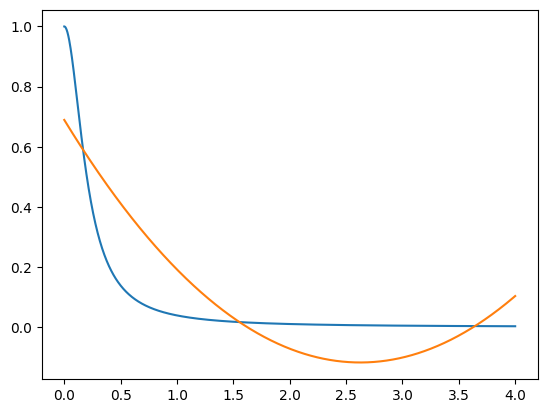

In [11]:
# Examples
import matplotlib.pyplot as plt


def chebyshev_nodes(a, b, n):
    k = np.arange(1, n+1)
    nodes = 0.5*(a + b) + 0.5*(b - a)*np.cos(np.pi*(k - 0.5)/n)
    return nodes.reshape(-1, 1)


def plot_lsfit(f, a, b, m, n):

    # Generate data points using Chebyshev nodes sampling
    x_chebyshev = chebyshev_nodes(a, b, n).reshape(-1, 1)
    y_chebyshev = f(x_chebyshev)

    # Fit a polynomial of degree at most m to the data
    coeffs_chebyshev = mylstsquarepolyfit(x_chebyshev, y_chebyshev, m)

    # Calculate the least square error
    x = np.linspace(a, b, 1000)
    y = f(x)
    error_chebyshev = np.sum(
        (y_chebyshev - np.polyval(coeffs_chebyshev[::-1], x_chebyshev))**2)
    print("This is the error for chebyshev nodes:", error_chebyshev)
    # Plot the results
    plt.plot(x, y, label='Original curve')
    plt.plot(x, np.polyval(coeffs_chebyshev[::-1], x), label='Chebishev nodes')


def f_1(x):
    return np.sqrt(x)

def f_2(x):
  return 1/(1+25*x**2)

plot_lsfit(f_2, 0, 4, 2, 100)


### <font color="red"> Ans 3. Write your observations here 
### <font color ="black"> With the increase in m, the degree of the polynomial, the error usually tends to increase. Though not in some cases and can lead to overfitting. For the same value of n and m, chebyshev nodes usually give a smaller error however for large values of n this might not be true. Especially when m is small and n is large. I observed that for the function f_2 for m=2 and n=10, error=0.23207045647880484 however for m=2, n=100 the error= 2.3059302388358387. Which kept on increasing, however for higher values of m the least square curve with chebishev curve tends to fit the original curve better.

    